In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sys
import os
sys.path.append('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/scripts/')
import data_cleaning

In [2]:
df = pd.read_csv('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/raw/menuitem.csv')

In [3]:
df.head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong,46673,0,0.6975,7.75,0.00,7.75,1,111000041,326,15-03-05
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,46673,0,0.1530,1.70,0.00,1.70,1,212000126,280,15-03-05
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch,12631,0,0.3230,3.64,0.61,4.25,1,121000008,8,15-03-05
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch,12631,0,0.3328,3.75,0.00,3.75,1,121000001,91,15-03-05
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in,12631,0,0.0443,0.50,0.00,0.50,1,175000062,564,15-03-05


# Check dữ liệu

## Kiểm tra kiểu dữ liệu

In [4]:
# Check kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MD5KEY_MENUITEM        91431 non-null  object 
 1   MD5KEY_ORDERSALE       91431 non-null  object 
 2   CategoryDescription    91431 non-null  object 
 3   DepartmentDescription  91431 non-null  object 
 4   Description            91431 non-null  object 
 5   StoreNumber            91431 non-null  int64  
 6   TaxInclusiveAmount     91431 non-null  int64  
 7   TaxAmount              91431 non-null  float64
 8   AdjustedPrice          91431 non-null  float64
 9   DiscountAmount         91431 non-null  float64
 10  Price                  91431 non-null  float64
 11  Quantity               91431 non-null  int64  
 12  PLU                    91431 non-null  int64  
 13  Id                     91431 non-null  int64  
 14  date                   91431 non-null  object 
dtypes:

## Check giá trị thiếu

In [5]:
# Check null
df.isna().sum()

MD5KEY_MENUITEM          0
MD5KEY_ORDERSALE         0
CategoryDescription      0
DepartmentDescription    0
Description              0
StoreNumber              0
TaxInclusiveAmount       0
TaxAmount                0
AdjustedPrice            0
DiscountAmount           0
Price                    0
Quantity                 0
PLU                      0
Id                       0
date                     0
dtype: int64

## Check trùng lặp

In [6]:
# check giá trị trùng lặp
df.duplicated().sum()

0

## Kiểm tra giá trị ngoại lai

In [7]:
df.columns

Index(['MD5KEY_MENUITEM', 'MD5KEY_ORDERSALE', 'CategoryDescription',
       'DepartmentDescription', 'Description', 'StoreNumber',
       'TaxInclusiveAmount', 'TaxAmount', 'AdjustedPrice', 'DiscountAmount',
       'Price', 'Quantity', 'PLU', 'Id', 'date'],
      dtype='object')

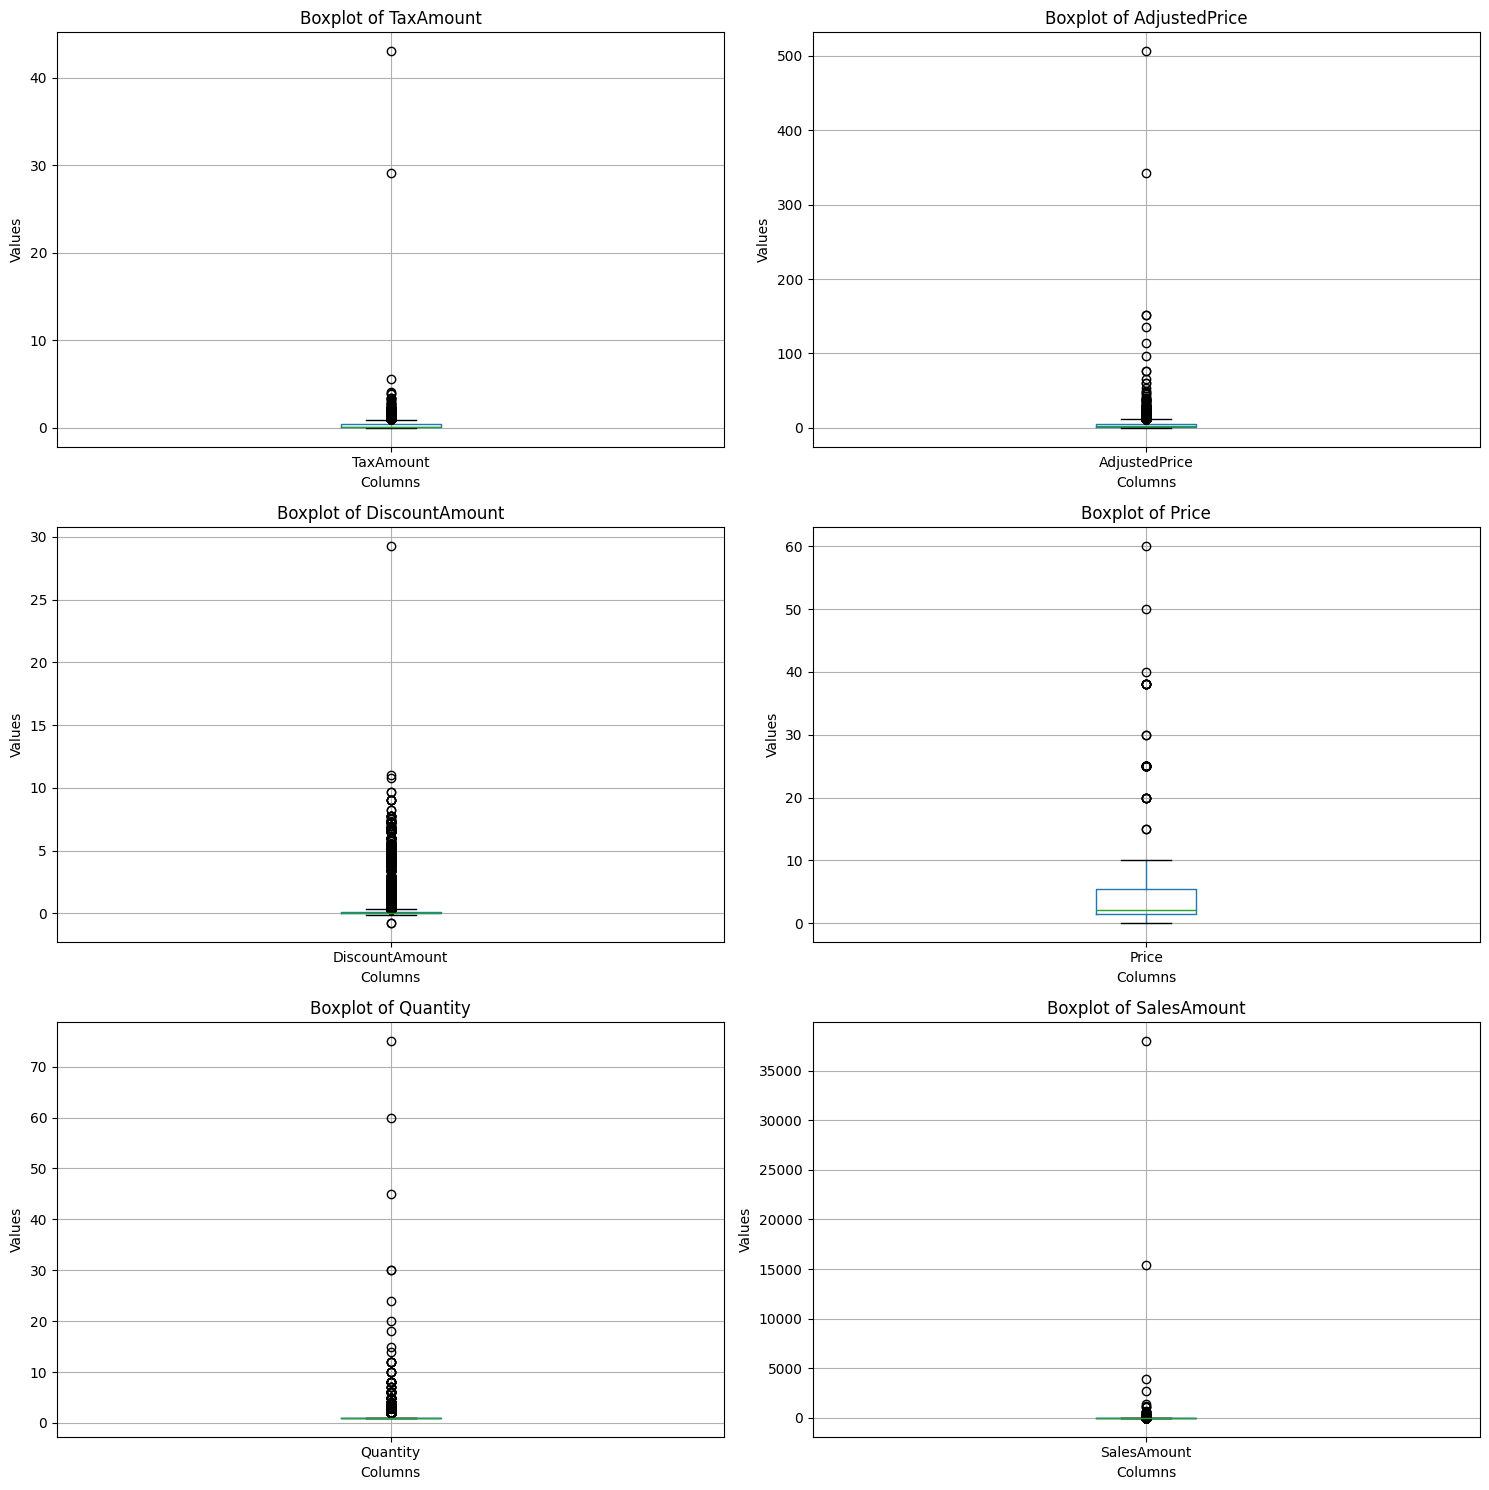

In [24]:
df_boxplt = df[['TaxAmount', 'AdjustedPrice', 'DiscountAmount', 'Price', 'Quantity', 'SalesAmount']]

# Tạo figure và các axes con với 3 hàng và 2 cột
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Vẽ từng boxplot vào từng subplot riêng biệt
for ax, column in zip(axes, df_boxplt):
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Values')

# Ẩn các subplot không sử dụng nếu có
for i in range(len(df_boxplt), len(axes)):
    fig.delaxes(axes[i])

# Tối ưu khoảng cách giữa các subplot
plt.tight_layout()
plt.show()

### Kiểm tra outliers Quantity

In [57]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định giá trị ngoại lai
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

print("Số hàng df:", df.shape[0])
print("Số hàng outliers:", outliers.shape[0])
print("% outliers:", outliers.shape[0]/df.shape[0]*100)
print("Tổng doanh thu:", df['SalesAmount'].sum())
print("Tổng doanh thu outliers:", outliers['SalesAmount'].sum())
print("% doanh thu outliers:", outliers['SalesAmount'].sum()/df['SalesAmount'].sum()*100)

Số hàng df: 91430
Số hàng outliers: 6864
% outliers: 7.507382697145356
Tổng doanh thu: 422626.30000000005
Tổng doanh thu outliers: 135857.33
% doanh thu outliers: 32.14597151194802


### Kiểm tra outliers Price

In [26]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)

# Tính IQR
IQR_Price = Q3_Price - Q1_Price

# Xác định giới hạn dưới và trên
lower_bound_Price = Q1_Price - 1.5 * IQR_Price
upper_bound_Price = Q3_Price + 1.5 * IQR_Price

# Xác định giá trị ngoại lai
outliers_Price = df[(df['Price'] < lower_bound_Price) | (df['Price'] > upper_bound_Price)]

print("Số hàng df:", df.shape[0])
print("Số hàng outliers:", outliers_Price.shape[0])
print("% outliers:", outliers_Price.shape[0]/df.shape[0]*100)
print("Tổng doanh thu:", df['SalesAmount'].sum())
print("Tổng doanh thu outliers:", outliers_Price['SalesAmount'].sum())
print("% doanh thu outliers:", outliers_Price['SalesAmount'].sum()/df['SalesAmount'].sum()*100)

Số hàng df: 91430
Số hàng outliers: 46
% outliers: 0.05031171387947063
Tổng doanh thu: 422626.30000000005
Tổng doanh thu outliers: 2834.0
% doanh thu outliers: 0.6705687743521876


### Kiểm tra outliers DiscountAmount

In [27]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1_Discount = df['DiscountAmount'].quantile(0.25)
Q3_Discount = df['DiscountAmount'].quantile(0.75)

# Tính IQR
IQR_Discount = Q3_Discount - Q1_Discount

# Xác định giới hạn dưới và trên
lower_bound_Discount = Q1_Discount - 1.5 * IQR_Discount
upper_bound_Discount = Q3_Discount + 1.5 * IQR_Discount

# Xác định giá trị ngoại lai
outliers_Discount = df[(df['DiscountAmount'] < lower_bound_Discount) | (df['DiscountAmount'] > upper_bound_Discount)]

print("Số hàng df:", df.shape[0])
print("Số hàng outliers:", outliers_Discount.shape[0])
print("% outliers:", outliers_Discount.shape[0]/df.shape[0]*100)
print("Tổng doanh thu:", df['SalesAmount'].sum())
print("Tổng doanh thu outliers:", outliers_Discount['SalesAmount'].sum())
print("% doanh thu outliers:", outliers_Discount['SalesAmount'].sum()/df['SalesAmount'].sum()*100)
print("Doanh trung bình outliers:", outliers_Discount['SalesAmount'].mean())
print("Trung bình giá món ăn trong outliers:", outliers_Discount['SalesAmount'].sum()/outliers_Discount['Quantity'].sum())

Số hàng df: 91430
Số hàng outliers: 11615
% outliers: 12.703707754566334
Tổng doanh thu: 422626.30000000005
Tổng doanh thu outliers: 65596.59
% doanh thu outliers: 15.521180295689122
Doanh trung bình outliers: 5.647575548859233
Trung bình giá món ăn trong outliers: 5.228069658085598


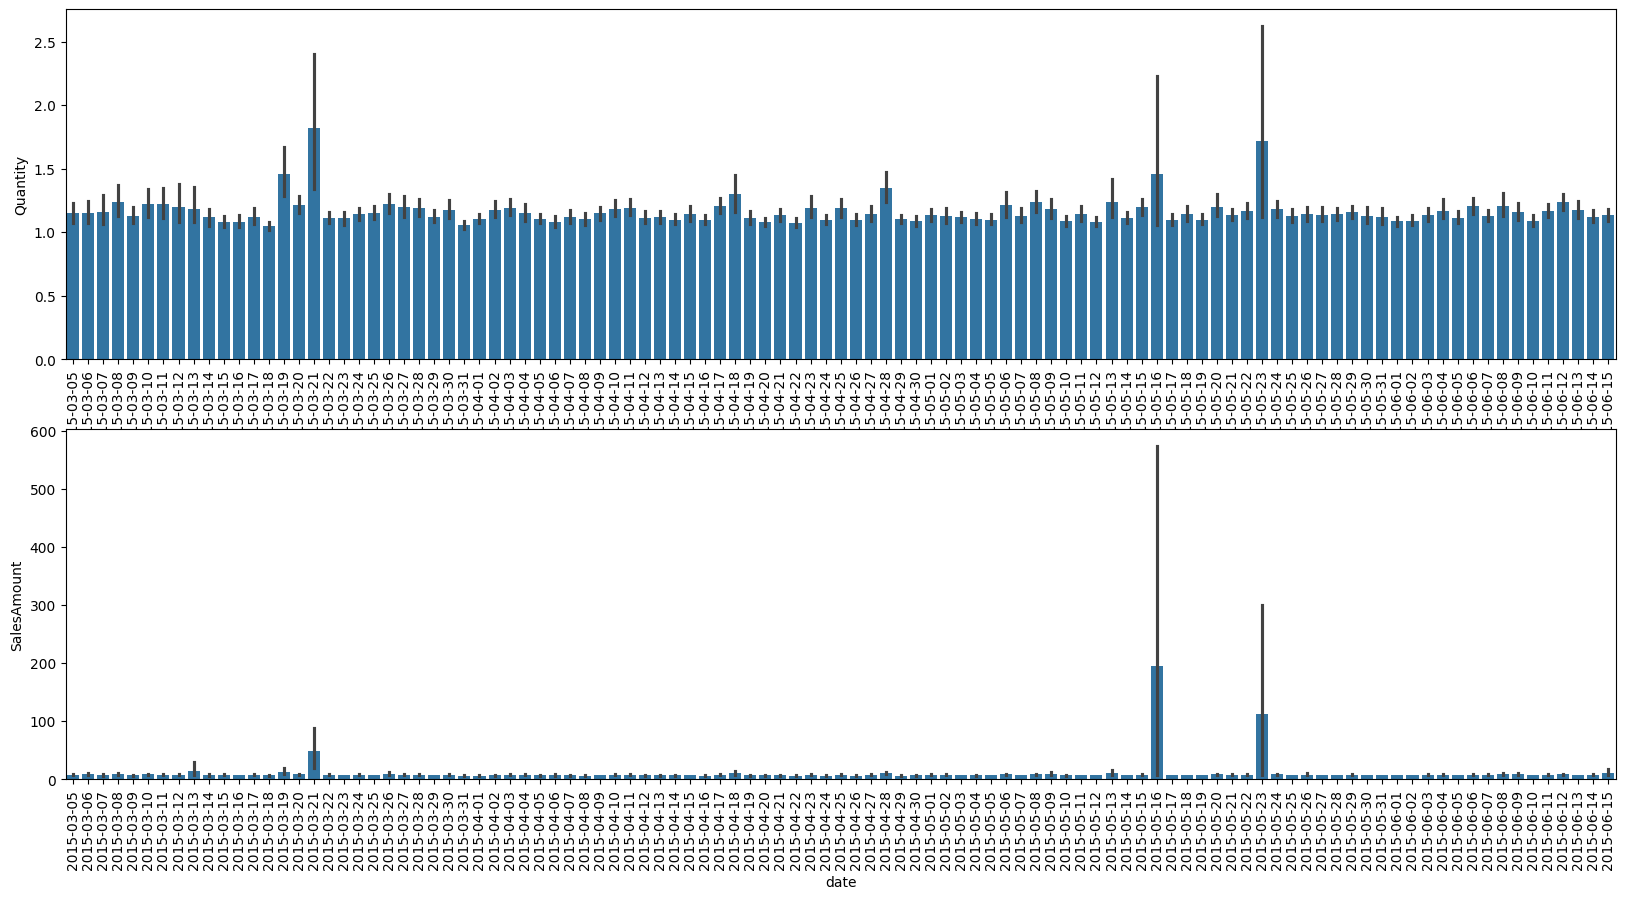

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.barplot(df[df['SalesAmount'] >= 5.2],
             x='date',
             y='Quantity')
plt.xticks(rotation=90, ha='center')

plt.subplot(2, 1, 2)
sns.barplot(df[df['SalesAmount'] >= 5.2],
             x='date',
             y='SalesAmount')
plt.xticks(rotation=90, ha='center')
plt.show()

In [62]:
print(lower_bound)
print(upper_bound)
print(lower_bound_Price)
print(upper_bound_Price)
print(lower_bound_Discount)
print(upper_bound_Discount)

1.0
1.0
-4.5
11.5
-0.195
0.325


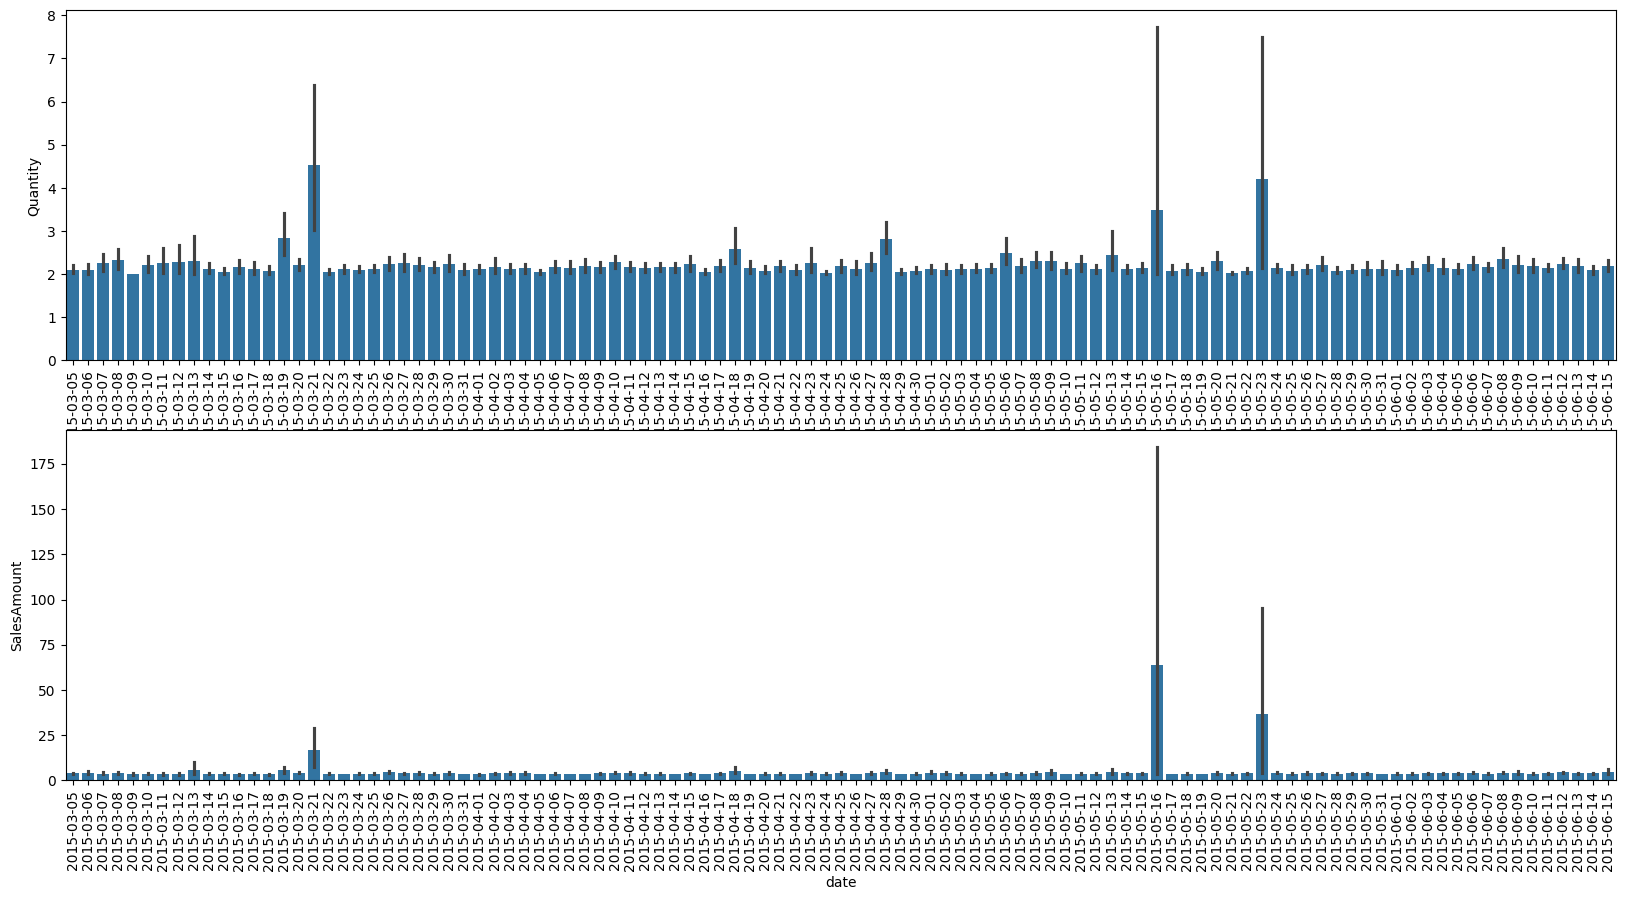

In [60]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.barplot(df[(df['Quantity'] > lower_bound) | (df['Quantity'] < upper_bound)],
             x='date',
             y='Quantity')
plt.xticks(rotation=90, ha='center')

plt.subplot(2, 1, 2)
sns.barplot(df[(df['SalesAmount'] > lower_bound_Price) | (df['SalesAmount'] < upper_bound_Price)],
             x='date',
             y='SalesAmount')
plt.xticks(rotation=90, ha='center')
plt.show()

In [28]:
df_16 = df[df['date'] == '2015-5-16']
print(df_16['Quantity'].unique())

[ 1  2  3 75  4]


In [35]:
df_16[df_16['Quantity'] == 75]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount
63798,7AFF6F9A39CC2CBBD33DFFFDF213DA88,B6BA5DC2E5670B796E57C435A64E8E60,Footlong,Footlong Sub,Turkey FtLong,4904,43.0312,506.25,0.0,6.75,75,111000012,12,2015-05-16,37968.75


In [36]:
df_23 = df[df['date'] == '2015-5-23']
print(df_23['Quantity'].unique())

[ 1  2 45  4  3  6 60]


In [37]:
df_23[df_23['Quantity'] >= 45]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount
69643,120875AC5766ED916C913794EA77BC50,68CBE43FC25B5EE67846D4489638732C,Footlong,Footlong Sub,Big Hot Pastrami FtLong,4904,29.07,342.0,29.25,8.25,45,111000026,142,2015-05-23,15390.0
70093,CED03E3D17732D7A30CF169E574AC9F9,68CBE43FC25B5EE67846D4489638732C,Chips,Chips,Chips,4904,5.61,66.0,6.00,1.20,60,311000100,277,2015-05-23,3960.0


## Kiểm tra phân phối dữ liệu


In [31]:
# Lọc các trường số
columns_num = df.select_dtypes(include=['int', 'float']).columns
columns_num

Index(['StoreNumber', 'TaxAmount', 'AdjustedPrice', 'DiscountAmount', 'Price',
       'Quantity', 'PLU', 'Id', 'SalesAmount'],
      dtype='object')

In [15]:
df[columns_num].describe()

,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id
count,91431.000000,91431.0,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,9.143100e+04,91431.000000
mean,18152.995319,0.0,0.263194,3.464881,0.200753,3.473435,1.092102,1.889488e+08,371.846048
std,14823.097615,0.0,0.291208,3.511239,0.672092,2.444280,0.534937,8.030443e+07,1078.178157
min,4904.000000,0.0,0.000000,0.000000,-0.750000,0.000000,1.000000,1.110000e+08,1.000000
25%,4904.000000,0.0,0.094900,1.270000,0.000000,1.500000,1.000000,1.120000e+08,64.000000
50%,12631.000000,0.0,0.150700,2.100000,0.000000,2.100000,1.000000,1.740000e+08,276.000000
75%,20974.000000,0.0,0.444700,5.500000,0.130000,5.500000,1.000000,2.210001e+08,280.000000
max,46673.000000,0.0,43.031200,506.250000,29.250000,60.000000,75.000000,4.110002e+08,10067.000000


In [16]:
# Trường TaxInclusiveAmount tất cả dữ liệu bằng 0 -> xoá
df['TaxInclusiveAmount'].sum()

0

In [53]:
# Sản phẩm có giá bằng 0 -> xoá
df[df['Price'] == 0]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount


In [38]:
df[df['CategoryDescription'] == 'Hot Beverage'].count()

MD5KEY_MENUITEM          180
MD5KEY_ORDERSALE         180
CategoryDescription      180
DepartmentDescription    180
Description              180
StoreNumber              180
TaxAmount                180
AdjustedPrice            180
DiscountAmount           180
Price                    180
Quantity                 180
PLU                      180
Id                       180
date                     180
SalesAmount              180
dtype: int64

In [32]:
# Sau khi loại bỏ price = 0
df[columns_num].describe()

,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,SalesAmount
count,91430.000000,91430.000000,91430.000000,91430.000000,91430.000000,91430.000000,9.143000e+04,91430.000000,91430.000000
mean,18153.140227,0.263197,3.464919,0.200755,3.473473,1.092103,1.889484e+08,371.843410,4.622403
std,14823.113917,0.291208,3.511240,0.672095,2.444266,0.534940,8.030474e+07,1078.183758,136.819293
min,4904.000000,0.000000,0.000000,-0.750000,0.050000,1.000000,1.110000e+08,1.000000,0.000000
25%,4904.000000,0.094900,1.270000,0.000000,1.500000,1.000000,1.120000e+08,64.000000,1.420000
50%,12631.000000,0.150700,2.100000,0.000000,2.100000,1.000000,1.740000e+08,276.000000,2.830000
75%,20974.000000,0.444700,5.500000,0.130000,5.500000,1.000000,2.210001e+08,280.000000,5.500000
max,46673.000000,43.031200,506.250000,29.250000,60.000000,75.000000,4.110002e+08,10067.000000,37968.750000


# Xử lý dữ liệu

## Chuyển dữ liệu trường data: object -> datetime

In [30]:
# Convert the date column to the datetime data type
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

## Xử lý khoảng trắng các trường object

In [33]:
df = data_cleaning.remove_whitespace(df)

## Thêm trường giá mua hàng

In [20]:
df['SalesAmount'] = df['AdjustedPrice'] * df['Quantity']

## Xoá các trường và dữ liệu

In [21]:
# Xoá cột TaxInclusiveAmount
df = df.drop(columns='TaxInclusiveAmount')

In [22]:
df = df[~(df['Price'] == 0)]

# Lưu trữ file sau khi xử lý

In [23]:

# current_date = datetime.now().strftime("%Y%m%d")
# parent_dir = "/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/processed" 

# # Tạo đường dẫn đầy đủ cho thư mục mới
# new_folder_path = os.path.join(parent_dir, current_date)

# # Kiểm tra xem thư mục đã tồn tại chưa, nếu chưa thì tạo mới
# if not os.path.exists(new_folder_path):
#     os.makedirs(new_folder_path)
#     print(f"Thư mục '{new_folder_path}' đã được tạo thành công!")
# else:
#     print(f"Thư mục '{new_folder_path}' đã tồn tại.")

# df.to_csv(f'{new_folder_path}/menuitem_{current_date}.csv', index=False)